In [39]:
# we used pd.read_csv for accessing our file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
import pickle

df = pd.read_csv("./rentfaster.csv")

In [40]:
# we can use head function for accessing initial raws so we can take overview of data
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [41]:
# info() function provide detailed information of data such as datatype, not null value in each column, memory usage and number of entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [42]:
# this function return the number of raw and column
df.shape

(25771, 18)

In [43]:
#just printed columns name
df.columns

Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'sq_feet', 'link',
       'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')

In [44]:
# we just created loop for accessing columns one by one and in loop 
#we used unique and nunique fuctions so we can get what type of unique value we have in each column and number of unique value in each column
def unique_values(df):
    count= 0
    for column in df.columns:
        unique_value= df[column].unique()
        unique_number=df[column].nunique()
        count+=1
        print(f"{count}. unique value in {column} : {unique_value} \n ")
        print(f"{count}. unique value number in {column} : {unique_number} \n ")
    

In [45]:
# print the function
unique_values(df)

1. unique value in rentfaster_id : [468622  92670 565052 ... 334133 334285 334284] 
 
1. unique value number in rentfaster_id : 9614 
 
2. unique value in city : ['Airdrie' 'Aldersyde' 'Balzac' 'Banff' 'Beaumont' 'Beiseker'
 'Black Diamond' 'Blackfalds' 'Bonnyville' 'Bowden' 'Brooks' 'Bruderheim'
 'Calgary' 'Camrose' 'Canmore' 'Carmangay' 'Chestermere' 'Cochrane'
 'Cold Lake' 'Crossfield' 'Crowsnest Pass' 'De Winton' 'Drumheller'
 'Duchess' 'Edmonton' 'Edson' 'Fort McMurray' 'Fort Saskatchewan'
 'Grande Prairie' 'High River' 'Innisfail' 'Lacombe' 'Langdon' 'Leduc'
 'Lethbridge' 'Medicine Hat' 'Morinville' 'Nisku' 'Okotoks' 'Olds'
 'Peace River' 'Ponoka' 'Priddis' 'Red Deer' 'Rocky View' 'Shaughnessy'
 'Sherwood Park' 'Slave Lake' 'Spruce Grove' 'St. Albert' 'St. Paul'
 'Stony Plain' 'Strathmore' 'Sundre' 'Sylvan Lake' 'Wainwright'
 'Westerose' 'Westlock' 'Wetaskiwin' 'Whitecourt' 'Abbotsford' 'Burnaby'
 'Campbell River' 'Chilliwack' 'Colwood' 'Comox' 'Coquitlam' 'Courtenay'
 'Cranbrook

As we will be working only with toronto rental predictions, we will filter our dataset by this city and drop the province, city and rentffaster:id

In [46]:
df_toronto = df[df['city'] == 'Toronto'].copy()

In [47]:
df_toronto

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
19563,365942,Toronto,Ontario,39 Niagara Street,43.641615,-79.400881,Long Term,Apartment,2227.0,Studio,1,NaN,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
19564,365942,Toronto,Ontario,39 Niagara Street,43.641615,-79.400881,Long Term,Apartment,2299.0,1 Bed,1,NaN,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
19565,365942,Toronto,Ontario,39 Niagara Street,43.641615,-79.400881,Long Term,Apartment,2668.0,1 Bed,2,NaN,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
19566,365942,Toronto,Ontario,39 Niagara Street,43.641615,-79.400881,Long Term,Apartment,3812.0,2 Beds,2,NaN,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
19567,365942,Toronto,Ontario,39 Niagara Street,43.641615,-79.400881,Long Term,Apartment,4124.0,3 Beds,2,NaN,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22451,565179,Toronto,Ontario,2370 Keele Street,43.706472,-79.478248,Long Term,Apartment,2300.0,1 Bed,1,NaN,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Call for Availability,Negotiable,True,True
22452,561976,Toronto,Ontario,31 D'Arcy Street,43.654879,-79.393079,Negotiable,Room For Rent,1500.0,1 Bed,1,NaN,/on/toronto/rentals/shared/1-bedroom/furnished...,Furnished,Call for Availability,Non-Smoking,False,False
22453,550659,Toronto,Ontario,116 Aldwych Avenue,43.684664,-79.341703,Long Term,Townhouse,5555.0,2 Beds,2,NaN,/on/toronto/rentals/shared/1-bedroom/non-smoki...,Unfurnished,Call for Availability,Non-Smoking,False,False
22454,550659,Toronto,Ontario,116 Aldwych Avenue,43.684664,-79.341703,Long Term,Townhouse,4444.0,1 Bed,1,NaN,/on/toronto/rentals/shared/1-bedroom/non-smoki...,Unfurnished,Call for Availability,Non-Smoking,False,False


In [48]:
# we dropped unwanted columns so we can do better analysis
df_toronto.drop(columns=["rentfaster_id","city","province","address","link","availability_date"],inplace= True)

In [49]:
# we used this function for getting number of null value in each column
df_toronto.isnull().sum()

latitude         0
longitude        0
lease_term       0
type             0
price            0
beds             0
baths            0
sq_feet        319
furnishing       0
smoking       1114
cats             0
dogs             0
dtype: int64

In [50]:
# Convert boolean column to integers
df_toronto['cats'] = df_toronto['cats'].astype(int)
df_toronto['dogs'] = df_toronto['dogs'].astype(int)

print(df_toronto[['cats', 'dogs']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 2893 entries, 19563 to 22455
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cats    2893 non-null   int32
 1   dogs    2893 non-null   int32
dtypes: int32(2)
memory usage: 45.2 KB
None


In [51]:
# our all values have sting formate so we converted it into numeric by using pandas
df_toronto["baths"] = pd.to_numeric(df_toronto["baths"], errors="coerce")

In [52]:
# from below columns, we dropped raws which hold null value as we are not going to analyze null values 
df.dropna(subset=["lease_term","beds","baths","cats","dogs","type"],inplace=True)

In [53]:
#we filled null value using mode which replace null value with most reapeated element
df_toronto["smoking"] = df_toronto["smoking"].fillna(df_toronto["smoking"].mode()[0])


In [54]:
df_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2893 entries, 19563 to 22455
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2893 non-null   float64
 1   longitude   2893 non-null   float64
 2   lease_term  2893 non-null   object 
 3   type        2893 non-null   object 
 4   price       2893 non-null   float64
 5   beds        2893 non-null   object 
 6   baths       2893 non-null   float64
 7   sq_feet     2574 non-null   object 
 8   furnishing  2893 non-null   object 
 9   smoking     2893 non-null   object 
 10  cats        2893 non-null   int32  
 11  dogs        2893 non-null   int32  
dtypes: float64(4), int32(2), object(6)
memory usage: 271.2+ KB


In [55]:
# sq_feet column hold all value in sting form so firstly, 
#we removed Sq. Ft. from value and convert string into numeric form by using to_numeric function
df_toronto["sq_feet"]= df_toronto["sq_feet"].str.replace("Sq. Ft.", " ",regex=False)
df_toronto["sq_feet"]=pd.to_numeric(df_toronto["sq_feet"], errors = "coerce")
print(df_toronto)

        latitude  longitude  lease_term           type   price    beds  baths  \
19563  43.641615 -79.400881   Long Term      Apartment  2227.0  Studio    1.0   
19564  43.641615 -79.400881   Long Term      Apartment  2299.0   1 Bed    1.0   
19565  43.641615 -79.400881   Long Term      Apartment  2668.0   1 Bed    2.0   
19566  43.641615 -79.400881   Long Term      Apartment  3812.0  2 Beds    2.0   
19567  43.641615 -79.400881   Long Term      Apartment  4124.0  3 Beds    2.0   
...          ...        ...         ...            ...     ...     ...    ...   
22451  43.706472 -79.478248   Long Term      Apartment  2300.0   1 Bed    1.0   
22452  43.654879 -79.393079  Negotiable  Room For Rent  1500.0   1 Bed    1.0   
22453  43.684664 -79.341703   Long Term      Townhouse  5555.0  2 Beds    2.0   
22454  43.684664 -79.341703   Long Term      Townhouse  4444.0   1 Bed    1.0   
22455  43.684664 -79.341703   Long Term  Room For Rent  2345.0   1 Bed    1.0   

       sq_feet   furnishing

In [56]:
# after converting all value in number form , we replaced null value by mean using fillna function
df_toronto["sq_feet"]= df_toronto["sq_feet"].fillna(df_toronto["sq_feet"].mean())
df_toronto["sq_feet"]

19563    674.559441
19564    674.559441
19565    674.559441
19566    674.559441
19567    674.559441
            ...    
22451    674.559441
22452    674.559441
22453    674.559441
22454    674.559441
22455    674.559441
Name: sq_feet, Length: 2893, dtype: float64

In [57]:
from sklearn.preprocessing import OrdinalEncoder
# define the order of the lease terms
lease_term_order = ['Negotiable', 'Short Term', '6 months', '12 months', 'months', 'Long Term']

# Create an OrdinalEncorder with the defined order
encoder = OrdinalEncoder(categories=[lease_term_order])
#apply the OrdinalEncorder to the column
df_toronto['lease_term'] = encoder.fit_transform(df_toronto[['lease_term']])


In [58]:
# define the order of the bed
beds_order = ['1 Bed', '2 Beds', '3 Beds', '4 Beds', '5 Beds', '6 Beds', '7 Beds', '8 Beds', '9 Beds', 'Studio']

# create ordinal encoder to define order
encoder = OrdinalEncoder(categories=[beds_order])

# reshape the data to fit the encoder and apply the OrdinalEncoder
df_toronto['beds'] = encoder.fit_transform(df_toronto[['beds']])


In [59]:
# to get information about data sach as type of column , no-null value
df_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2893 entries, 19563 to 22455
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2893 non-null   float64
 1   longitude   2893 non-null   float64
 2   lease_term  2893 non-null   float64
 3   type        2893 non-null   object 
 4   price       2893 non-null   float64
 5   beds        2893 non-null   float64
 6   baths       2893 non-null   float64
 7   sq_feet     2893 non-null   float64
 8   furnishing  2893 non-null   object 
 9   smoking     2893 non-null   object 
 10  cats        2893 non-null   int32  
 11  dogs        2893 non-null   int32  
dtypes: float64(7), int32(2), object(3)
memory usage: 271.2+ KB


In [60]:
df_toronto["type"].unique()

array(['Apartment', 'Townhouse', 'Condo Unit', 'Duplex', 'House',
       'Basement', 'Room For Rent', 'Main Floor'], dtype=object)

In [61]:
#now we again checked for null value and we don't have any null value so we can go for further step
df_toronto.isnull().sum()


latitude      0
longitude     0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

In [62]:
# now, we can see that all coulumn have integer or float value
df_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2893 entries, 19563 to 22455
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2893 non-null   float64
 1   longitude   2893 non-null   float64
 2   lease_term  2893 non-null   float64
 3   type        2893 non-null   object 
 4   price       2893 non-null   float64
 5   beds        2893 non-null   float64
 6   baths       2893 non-null   float64
 7   sq_feet     2893 non-null   float64
 8   furnishing  2893 non-null   object 
 9   smoking     2893 non-null   object 
 10  cats        2893 non-null   int32  
 11  dogs        2893 non-null   int32  
dtypes: float64(7), int32(2), object(3)
memory usage: 271.2+ KB


In [63]:
# we can see min,max, standard diviation , mean and other things by using this function
df_toronto.describe ()

,latitude,longitude,lease_term,price,beds,baths,sq_feet,cats,dogs
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,43.681079,-79.397321,4.980989,2814.235347,1.777739,1.289146,674.559441,0.815762,0.816454
std,0.039398,0.060943,0.284424,1120.041284,3.001042,0.473312,259.208092,0.387745,0.387181
min,43.387191,-80.494818,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,43.654262,-79.422656,5.000000,2295.000000,0.000000,1.000000,540.000000,1.000000,1.000000
50%,43.668299,-79.392573,5.000000,2698.000000,1.000000,1.000000,674.559441,1.000000,1.000000
75%,43.699738,-79.374890,5.000000,3215.000000,1.000000,2.000000,815.000000,1.000000,1.000000
max,43.813090,-79.203175,5.000000,19170.000000,9.000000,3.500000,2553.000000,1.000000,1.000000


### Visualization

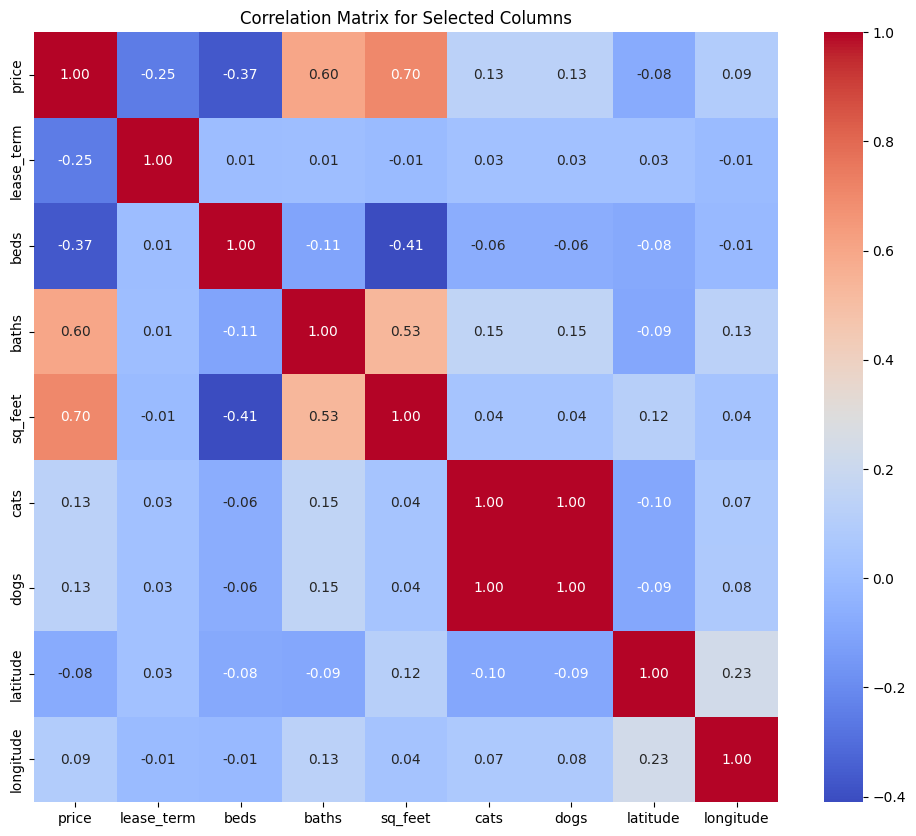

In [64]:

# Define the list of columns to include in the heatmap
columns_of_interest = ['price', 'type', 'lease_term', 'beds', 'baths', 'sq_feet', 'furnishing', 'smoking', 'cats', 'dogs','latitude','longitude']

# Select the subset of columns
df_subset = df_toronto[columns_of_interest]

# Create and display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_subset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Columns')
plt.show()


### visualization

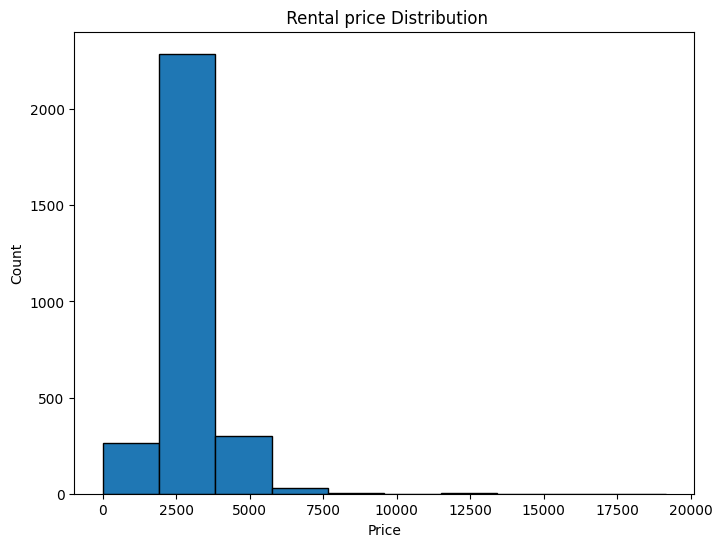

In [65]:
import matplotlib.pyplot as plt
# using histogram for more visualisation
plt.figure(figsize=(8,6))
plt.hist(df_toronto['price'],bins=10, edgecolor='black')
# adding title and label for the histogram
plt.title(" Rental price Distribution")
plt.xlabel('Price')
plt.ylabel('Count')
# displaying the histogram
plt.show()


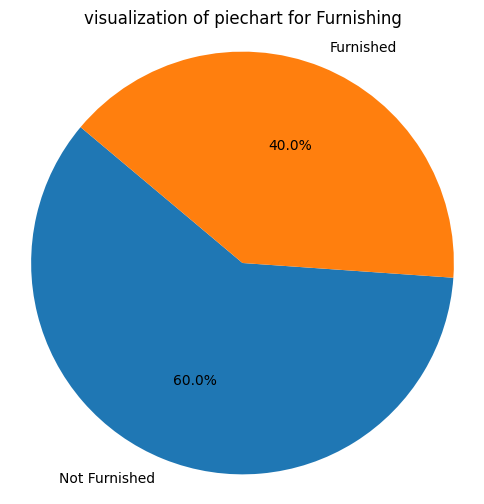

In [66]:
# data for pie chart 
furn_count=[60,40] #no. of properties : not furnished-60,furnished-40
labels=['Not Furnished','Furnished']
# creating pie chart
plt.figure(figsize=(6,6))
plt.pie(furn_count,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title( 'visualization of piechart for Furnishing')
plt.axis('equal')    # equal here shows that pie is drwan as a circle
plt.show()

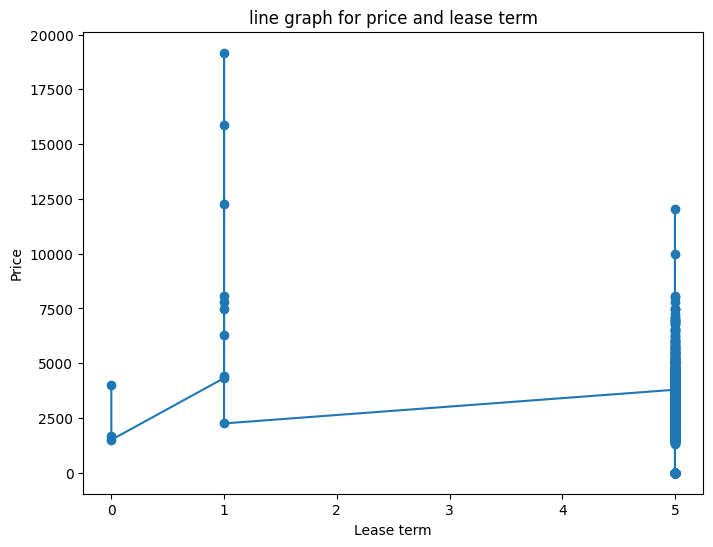

In [67]:
# sorting df by lease term
val= df_toronto.sort_values(by="lease_term")
# creating line graph
plt.figure(figsize=(8,6))
plt.plot(val['lease_term'],val['price'],marker='o',label='price')
# adding title and labels to the graph
plt.title("line graph for price and lease term")
plt.xlabel("Lease term")
plt.ylabel("Price")
# showing the plot
plt.show()


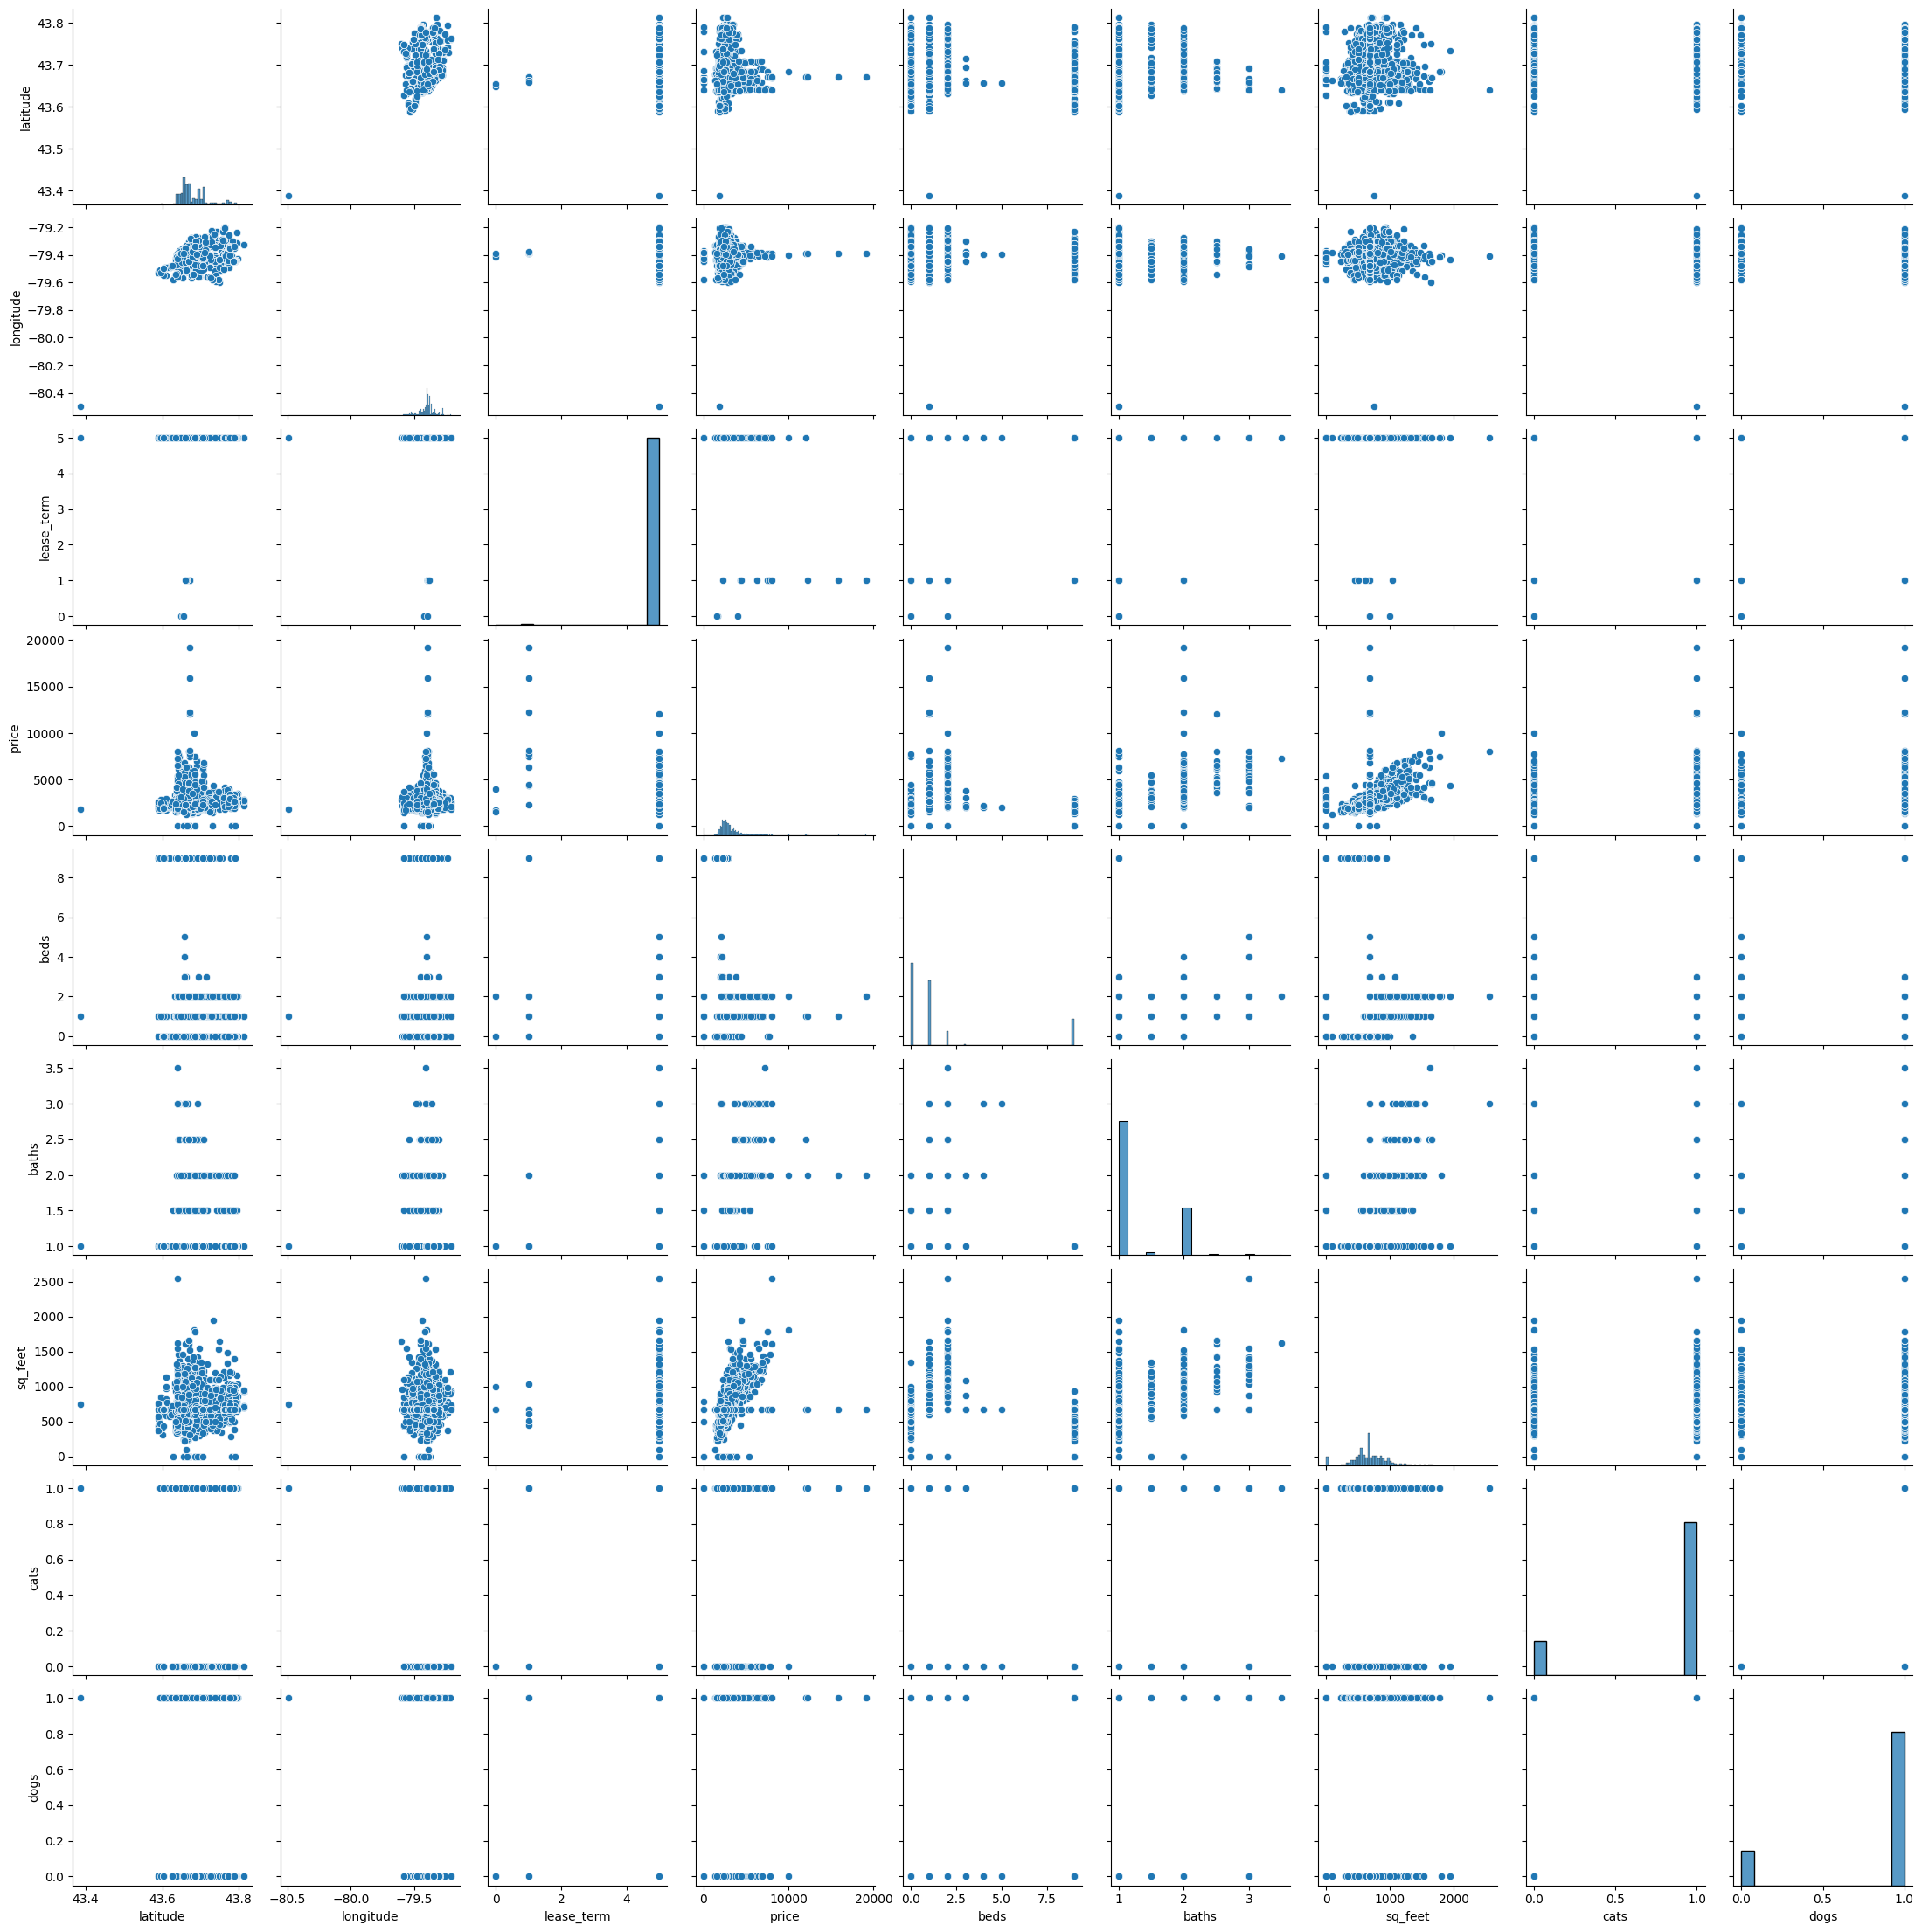

In [68]:
# creating a pairplot 
import seaborn as sns
# using numerical columns in df
num_col=df_toronto.select_dtypes(include=['int32','float64'])
sns.pairplot(num_col)

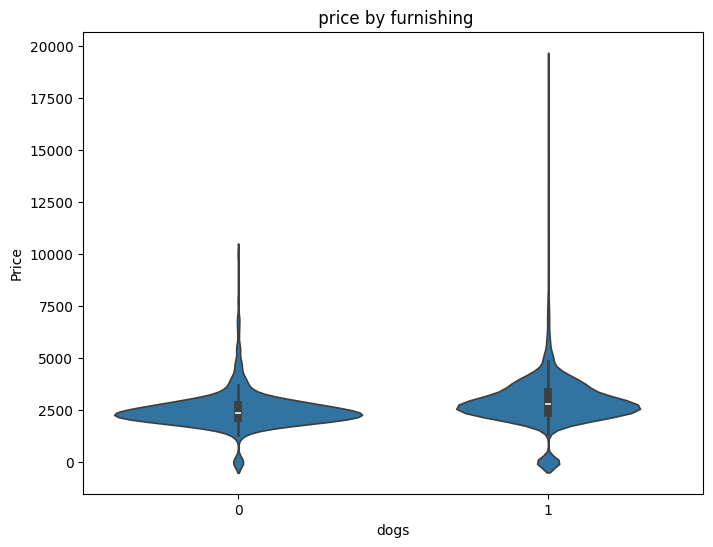

In [69]:
# creating a violin plot 
import seaborn as sns
plt.figure(figsize=(8,6))
sns.violinplot(x='dogs',y='price',data=df_toronto)
# adding title and labels to the plot
plt.title(" price by furnishing")
plt.xlabel("dogs")
plt.ylabel("Price")
# showing the plot
plt.show()

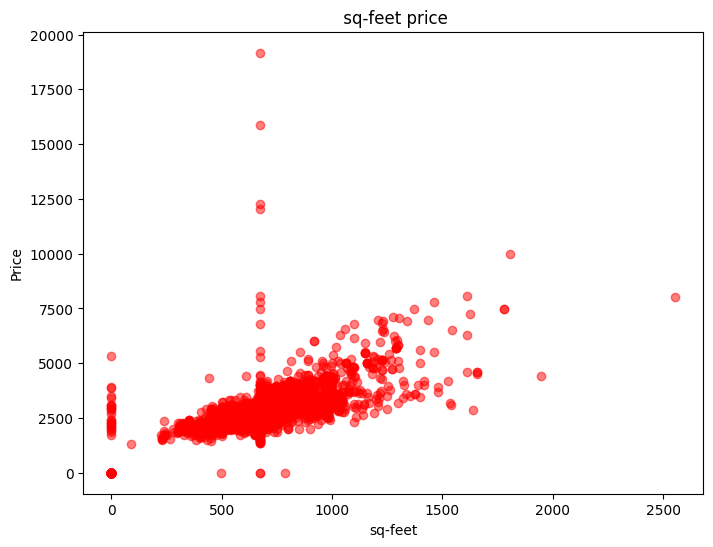

In [70]:
# creating scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_toronto['sq_feet'],df_toronto['price'],color='r',alpha=0.5,label='baths')
# adding titile and lables for the plot 
plt.title(" sq-feet price")
plt.xlabel("sq-feet")
plt.ylabel("Price")
# showing the plot
plt.show()

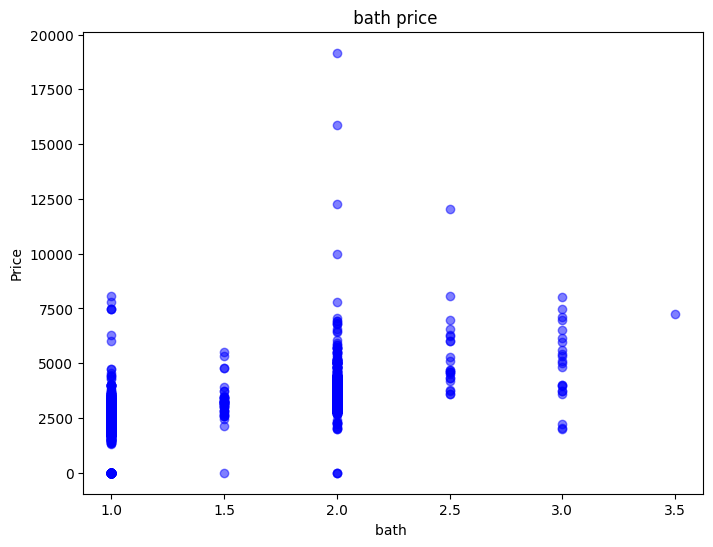

In [71]:
# creating another scatter plot for better visualization
plt.figure(figsize=(8,6))
plt.scatter(df_toronto['baths'],df_toronto['price'],color='b',alpha=0.5,label='baths')
# adding title and labels for the plot 
plt.title(" bath price")
plt.xlabel("bath ")
plt.ylabel("Price")
# showing the plot
plt.show()

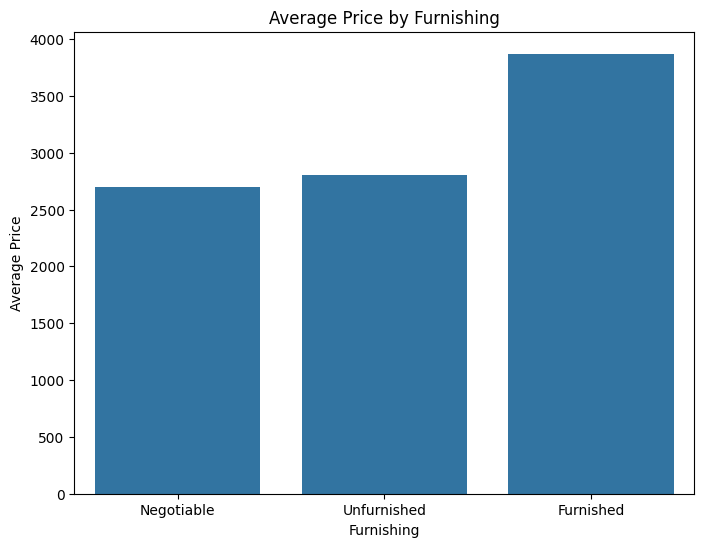

In [72]:
# Creating a barplot 
# Calculating average of price on the basis of FURNISHING
avg_price_furnishing = df_toronto.groupby("furnishing")['price'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_furnishing.index, y=avg_price_furnishing.values)
# Insert title and labels
plt.title("Average Price by Furnishing")
plt.xlabel("Furnishing")
plt.ylabel("Average Price")
plt.show()


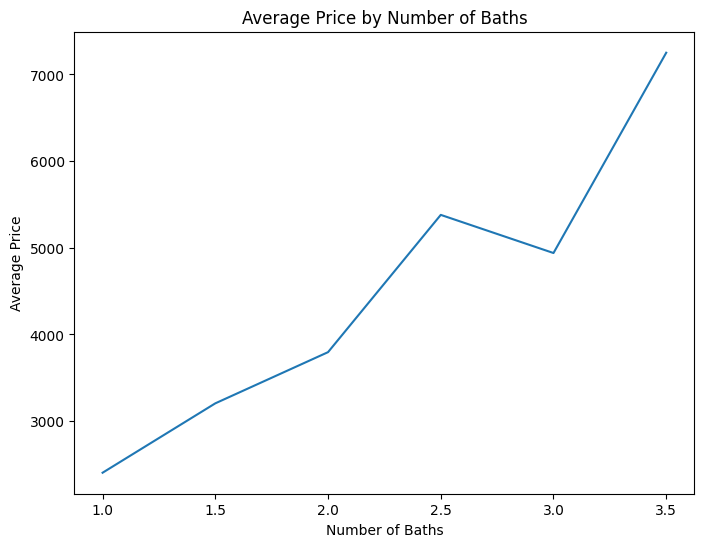

In [73]:
# avwrage price ibn basis of baths 
avg_price_baths = df_toronto.groupby("baths")['price'].mean().sort_values()
plt.figure(figsize=(8,6))
# created line plot and give x and y as index and values
sns.lineplot(x=avg_price_baths.index, y=avg_price_baths.values)
# adding title and labels for the plot
plt.title("Average Price by Number of Baths")
plt.xlabel("Number of Baths")
plt.ylabel("Average Price")
#displaying the plot
plt.show()

In [74]:
unique_values(df_toronto)

1. unique value in latitude : [43.64161486 43.69288768 43.6617852  43.6669029  43.706028   43.6626423
 43.6514035  43.7103771  43.6579605  43.65642765 43.6677017  43.6836014
 43.6954523  43.6555991  43.7060013  43.6671982  43.7538791  43.6640947
 43.6640015  43.6874886  43.6639081  43.66973188 43.7743998  43.6434647
 43.6424197  43.6542619  43.7112787  43.6480117  43.6401038  43.69501489
 43.6688769  43.7092982  43.6715017  43.6431567  43.7247055  43.638817
 43.6976352  43.671323   43.7091236  43.685763   43.6691288  43.7746402
 43.6699837  43.6672544  43.6684862  43.7123425  43.70654579 43.780286
 43.663292   43.694454   43.6949104  43.7349456  43.7069432  43.5907831
 43.7453554  43.6866542  43.69973845 43.6950176  43.6431922  43.765046
 43.6435388  43.6547286  43.6435554  43.6552908  43.7950406  43.6852102
 43.69853878 43.7151471  43.70341216 43.6680383  43.70181875 43.6796625
 43.656073   43.70194826 43.660269   43.7018544  43.6469392  43.68964348
 43.7445271  43.7056818  43.63497  

In [75]:
# assigning x with all feature instead of target feature (price)
X=df_toronto.drop('price',axis=1)
# assigning y with target feature (price) only
y=df_toronto['price']
catg_colmn=['type','furnishing','smoking']
nume_colmn= X.select_dtypes(include=['int32','float64']).columns.tolist()
nume_colmn=[col for col in nume_colmn if col not in catg_colmn]
# preprocessing for numerical and categorical data
numerical_trans = StandardScaler()
categorical_trans= OneHotEncoder(handle_unknown='ignore')
preprocessor= ColumnTransformer( 
    transformers=[
        ('num',numerical_trans,nume_colmn),
        ('cat',categorical_trans,catg_colmn)
    ]
)
# now splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
# Making class ModelTrainer
class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test, preprocessor):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.preprocessor = preprocessor
        self.results = {}
        self.best_model = None

    def train_eval(self, model_name, model, params):
        # Making pipeline here
        pipeline = Pipeline(steps=[('preprocessor', self.preprocessor),
                                   ('model', model)])
        # Doing grid searching
        grid_srch = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='r2', n_jobs=-1)
        grid_srch.fit(self.X_train, self.y_train)

        # Save the best model
        self.best_model = grid_srch.best_estimator_

        # Predicting and evaluating is done here
        y_pred = self.best_model.predict(self.X_test)
        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)

        # Showing the result evaluated above
        self.results[model_name] = {
            'Best Params': grid_srch.best_params_,
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        }
        print(f"Results for {model_name}:")
        print(f"Best Params: {grid_srch.best_params_}")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"R2: {r2}\n")

    def get_result(self):
        return self.results

    def save_best_model(self, filename):
        if self.best_model is not None:
            with open(filename, 'wb') as file:
                pickle.dump(self.best_model, file)
            print(f"Best model saved as {filename}")
        else:
            print("No model to save. Please run train_eval first.")



In [77]:
# initalizing the traine for model here 
traine = ModelTrainer(X_train, X_test,y_train,y_test,preprocessor)

In [78]:
# training  and evaluating the linear regression model here 
print(" TRAINING AND EVALUATING LINEAR REGRESSION ....")
traine.train_eval('Linear Regression', LinearRegression(),{})

 TRAINING AND EVALUATING LINEAR REGRESSION ....
Results for Linear Regression:
Best Params: {}
MAE: 396.7061422945106
MSE: 549949.2182548883
R2: 0.48367923422597436



In [79]:
# Now Doing training and evaluation for Decession tree 
print(" TRAINING AND EVALUATING DECISION TREE....")
traine.train_eval('Decision Tree',DecisionTreeRegressor(),{
    'model__max_depth' : [5, 10, 15],
    'model__min_samples_split': [2, 5, 10]
})

 TRAINING AND EVALUATING DECISION TREE....
Results for Decision Tree:
Best Params: {'model__max_depth': 15, 'model__min_samples_split': 5}
MAE: 190.47617838613778
MSE: 176194.49489064177
R2: 0.8345794966019207



In [80]:
# now tarining and evaluation is done for random forest
print(" TRAINING AND EVALUATING RANDOM FOREST....")
traine.train_eval('Random Forest', RandomForestRegressor(),{
    'model__n_estimators':[100,200],
    'model__max_depth': [10,20],
    'model__min_samples_split': [2,5]
})

 TRAINING AND EVALUATING RANDOM FOREST....
Results for Random Forest:
Best Params: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
MAE: 164.05365425778692
MSE: 110810.56051230669
R2: 0.8959653154138206



In [81]:
# now tarining and evaluating Gradient Boosting 
print(" TRAINING AND EVALUATING GRADIENT BOOSTING ....")
traine.train_eval('Gradent Boosting', GradientBoostingRegressor(),{
    'model__n_estimators': [100,200],
    'model__learning_rate': [0.01,0.1,0.2],
    'model__max_depth':[3,5,7]
})

 TRAINING AND EVALUATING GRADIENT BOOSTING ....
Results for Gradent Boosting:
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
MAE: 195.50150682093167
MSE: 109048.05228841661
R2: 0.8976200492794849



In [82]:
%pip install xgboost
from xgboost import  XGBRegressor

# now training and evaluating last XGBOOST model
print(" TRAINING AND EVALUATING XGBOOST .....")
traine.train_eval('XGBoost',XGBRegressor(),{
    'model__n_estimators':[100,200],
    'model__learning_rate':[0.01,0.1,0.2],
    'model__max_depth':[3,5,7]
})


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: c:\Users\Andrea FS\.pyenv\pyenv-win\versions\3.11.4\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
 TRAINING AND EVALUATING XGBOOST .....
Results for XGBoost:
Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 144.92257765840785
MSE: 70804.0987494175
R2: 0.9335254505820656



In [83]:
# now tarining and evaluating Gradient Boosting 
print(" TRAINING AND EVALUATING GRADIENT BOOSTING ....")
traine.train_eval('Gradent Boosting', GradientBoostingRegressor(),{
    'model__n_estimators': [100,200],
    'model__learning_rate': [0.01,0.1,0.2],
    'model__max_depth':[3,5,7]
})
# Save the best Gradient Boosting model
traine.save_best_model('best_gradient_boosting_model.pkl')

 TRAINING AND EVALUATING GRADIENT BOOSTING ....
Results for Gradent Boosting:
Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 143.6114217323407
MSE: 77145.03458913449
R2: 0.9275722521051668

Best model saved as best_gradient_boosting_model.pkl


# Saving the model

In [91]:
# Load the model from the file
with open('best_gradient_boosting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test.iloc[:2])
type(predictions)
print(predictions)

[2068.25698854 3275.43582228]
